# Import Modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Loading Datasets
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Statistical Info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Datatype Info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

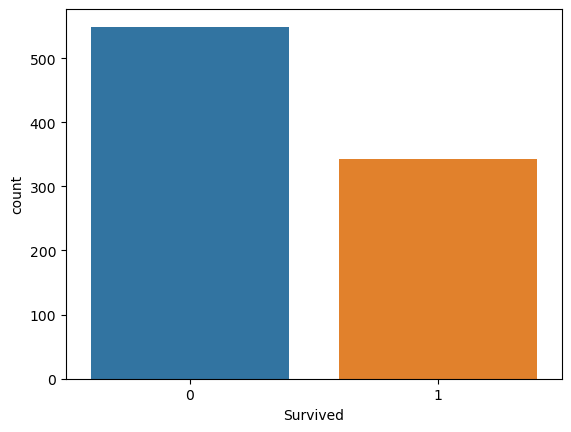

In [7]:
# Categorical Attributes
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Pclass', ylabel='count'>

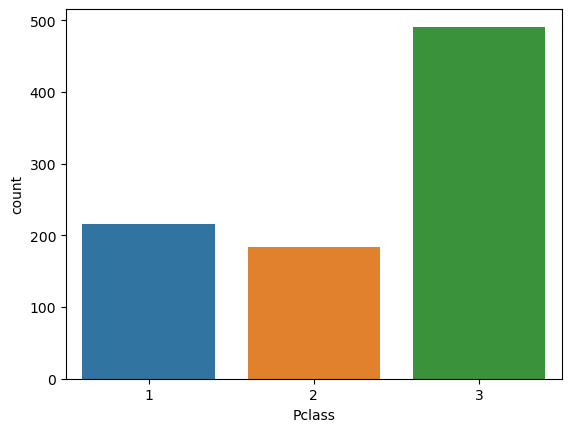

In [8]:
sns.countplot(x='Pclass',data=train)

<Axes: xlabel='Sex', ylabel='count'>

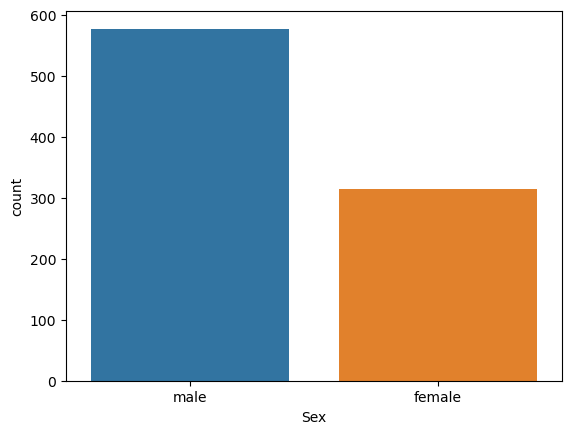

In [9]:
sns.countplot(x='Sex',data=train)

<Axes: xlabel='SibSp', ylabel='count'>

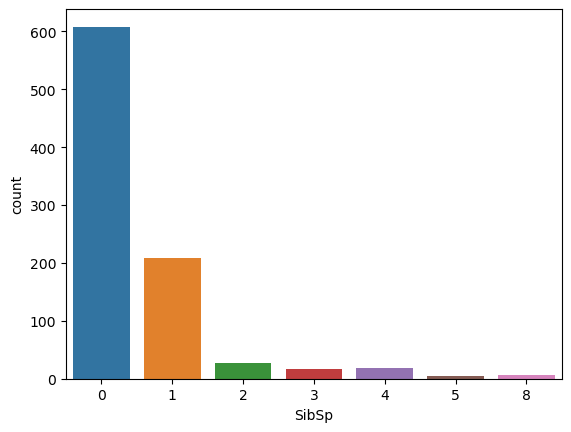

In [10]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Parch', ylabel='count'>

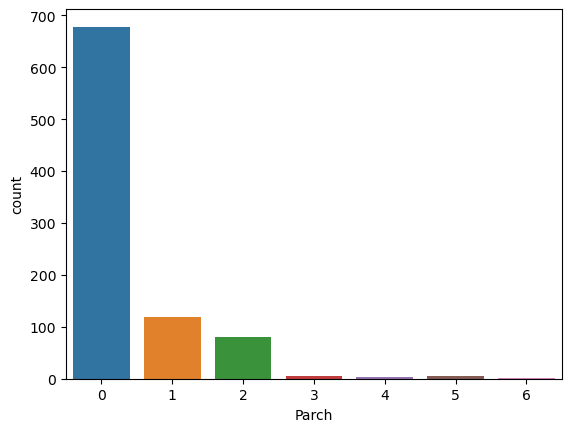

In [11]:
sns.countplot(x='Parch',data=train)

<Axes: xlabel='Embarked', ylabel='count'>

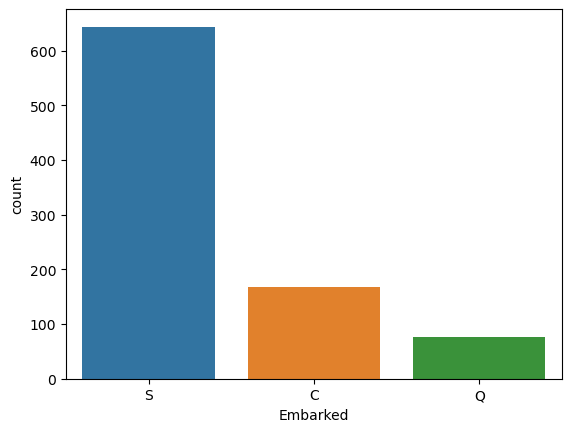

In [12]:
sns.countplot(x='Embarked',data=train)

<Axes: xlabel='Age', ylabel='Density'>

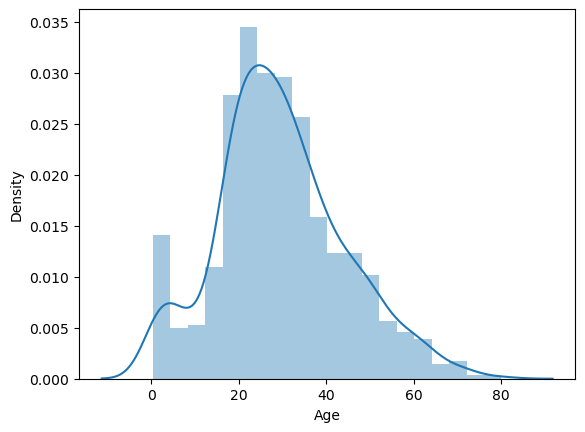

In [13]:
# Numerical Attributes
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

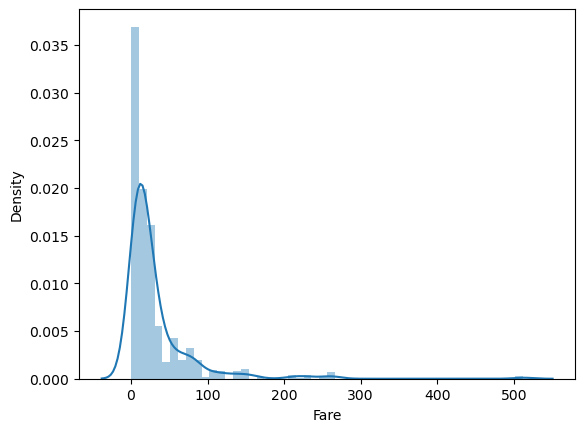

In [14]:
sns.distplot(train['Fare'])

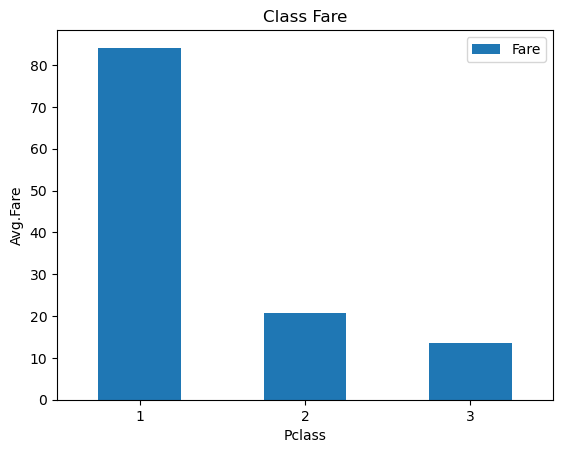

In [15]:
# To Know the Distribution of Ticket Class with Price using mean value
class_fare = train.pivot_table(index='Pclass',values='Fare')
class_fare.plot(kind='bar')
plt.title('Class Fare')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

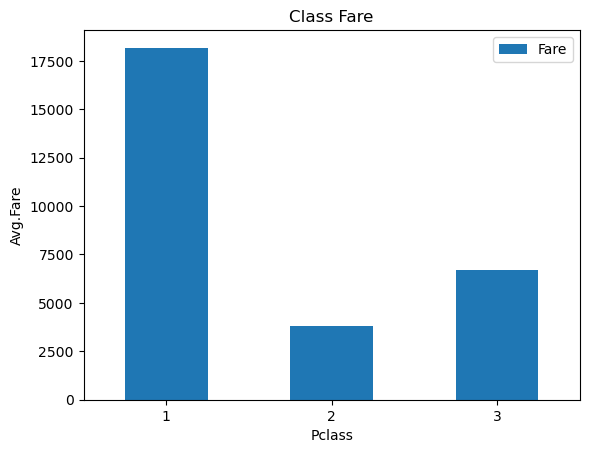

In [16]:
# To Know the Distribution of Ticket Class with Price using Aggregate Funtion
class_fare = train.pivot_table(index='Pclass',values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.title('Class Fare')
plt.xlabel('Pclass')
plt.ylabel('Avg.Fare')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

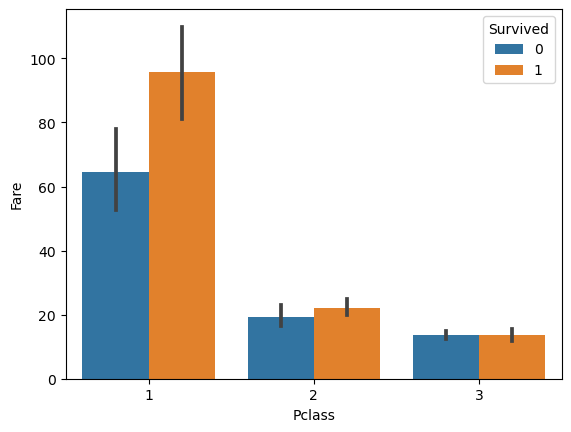

In [17]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

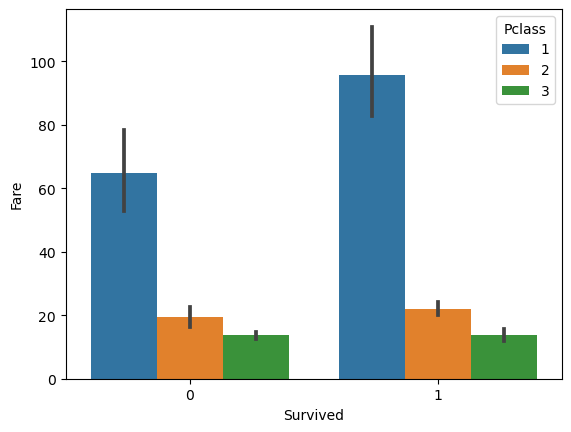

In [18]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

# Data Preprocessing

In [68]:
train_len = len(train)
# Combine Two Dataframes
df = pd.concat([train,test], axis=0)
df = df.reset_index (drop=True)# To Reset  and Drop the Index

In [69]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,NaN,2
1,2,1.0,1,0,38.0,1,0,4.280593,C85,0
2,3,1.0,3,0,26.0,0,0,2.188856,NaN,2
3,4,1.0,1,0,35.0,1,0,3.990834,C123,2
4,5,0.0,3,1,35.0,0,0,2.202765,NaN,2


In [21]:
# To Know Training Dataset Length
train_len

891

In [22]:
# Total Appended Data
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [24]:
# Find the Null Values
df.isnull().sum()


PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [25]:
# Drop or Delete the Column
df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [26]:
# Another Method for Drop or Delete the Column
df.drop(columns=['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [27]:
df['Age'].mean()

29.881137667304014

In [28]:
df['Fare'].mean()

33.29547928134557

In [29]:
# Fill Missing Values Using Mean of that Numerical Columns
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [30]:
# We use Mode bcoz Embarked is a Categorical Value
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [31]:
# We just have to use S only
df['Embarked'].mode()[0]

'S'

In [32]:
# Fill Missing Values Using Mean of that Categorical Columns
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [33]:
# Check Null Values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

# Log Transformation for Uniform Data Distribution

here, Fare is not uniform. so, we have to change Fare 

<Axes: xlabel='Fare', ylabel='Density'>

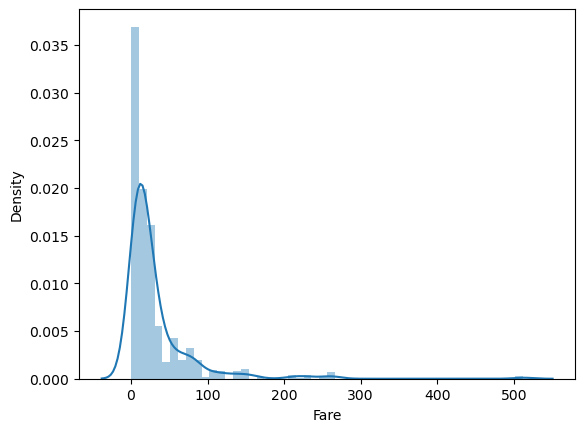

In [34]:
sns.distplot(train['Fare']) #this is for training data

<Axes: xlabel='Fare', ylabel='Density'>

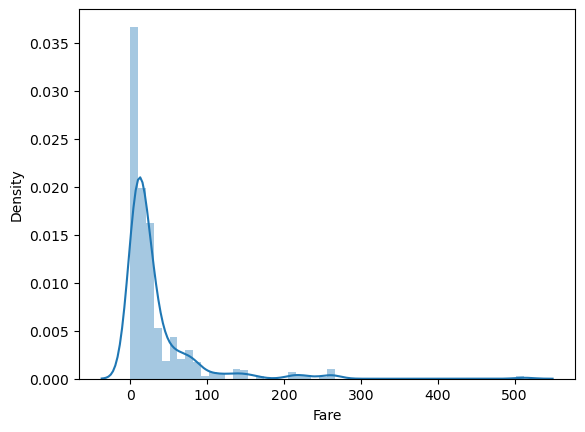

In [35]:
sns.distplot(df['Fare']) # for whole data

still remains the same

In [36]:
df['Fare'] = np.log(df['Fare']+1)
# we have to add +1 when we are using logarithmic functions bcoz whenever a Fare is 0 or null values, it will throw an error 

<Axes: xlabel='Fare', ylabel='Density'>

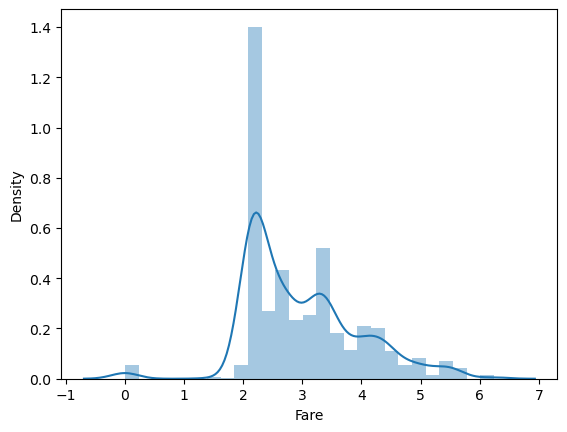

In [37]:
sns.distplot(df['Fare'])

# Correlation Matrix

From this, we can able to clear which input attribute affects the column

<Axes: >

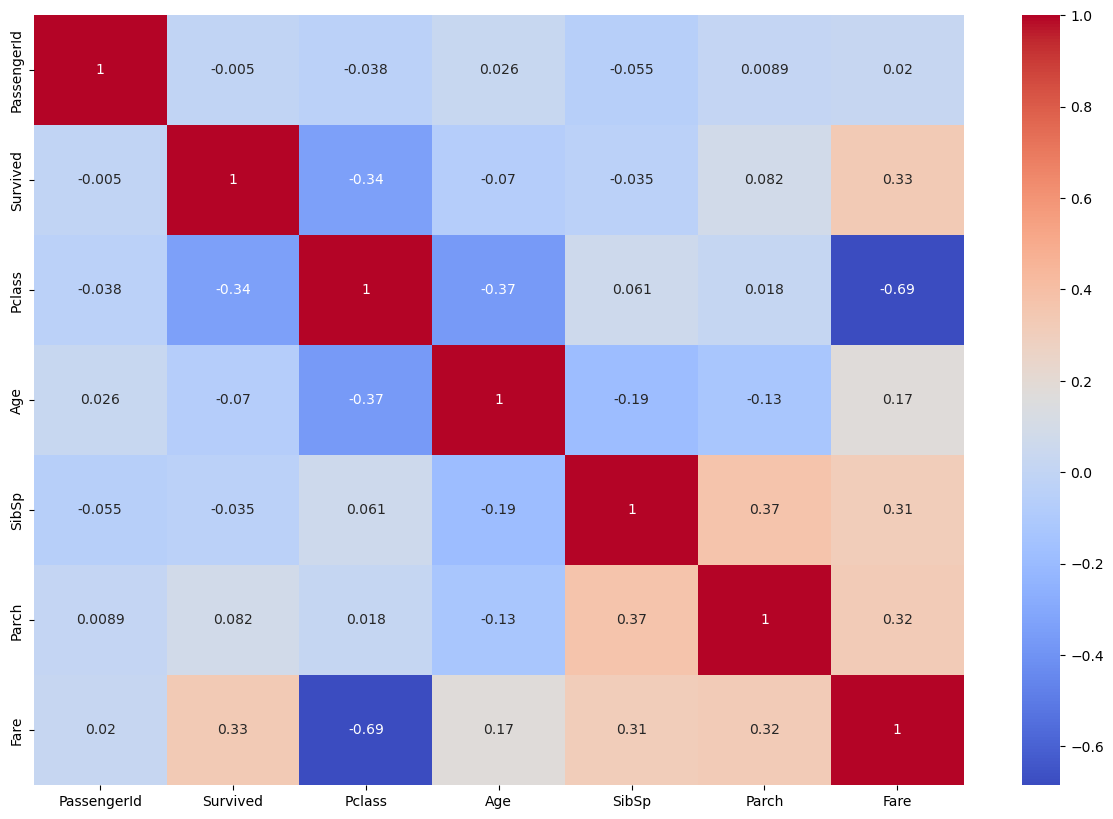

In [38]:
corr = df.corr() # TO create this for return a Correlation Matrix
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap='coolwarm') # Heatmap for Displaying a Correlation Matrix, Annot means to Display the MAtrix Values and Coolwarm is used for Differentiate b/w Highly Related Attributes

Dark colours means high correlation

In [39]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,NaN,S


here, PassengerId, Ticket and Name are not important, so we can drop the columns, we can conver Sex and Embarked into an integer by preprocessing

In [40]:
# Drop Unneccessary Columns
df = df.drop(columns=['Name', 'Ticket'], axis=1)
## we will be dropping the PassengerId in the end,bcoz we have to use this for the submission so keep it for temporary basis
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,NaN,S
1,2,1.0,1,female,38.0,1,0,4.280593,C85,C
2,3,1.0,3,female,26.0,0,0,2.188856,NaN,S
3,4,1.0,1,female,35.0,1,0,3.990834,C123,S
4,5,0.0,3,male,35.0,0,0,2.202765,NaN,S


# Label Encoding

In [41]:
# Convert Sex and Embarked into an Interger
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,NaN,2
1,2,1.0,1,0,38.0,1,0,4.280593,C85,0
2,3,1.0,3,0,26.0,0,0,2.188856,NaN,2
3,4,1.0,1,0,35.0,1,0,3.990834,C123,2
4,5,0.0,3,1,35.0,0,0,2.202765,NaN,2


# Train-Test Split

we have to split the dataset for training and validation

In [42]:
train = df.iloc[:train_len, :]
test = df.iloc[train_len: , :]

In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0.0,3,1,22.0,1,0,2.110213,NaN,2
1,2,1.0,1,0,38.0,1,0,4.280593,C85,0
2,3,1.0,3,0,26.0,0,0,2.188856,NaN,2
3,4,1.0,1,0,35.0,1,0,3.990834,C123,2
4,5,0.0,3,1,35.0,0,0,2.202765,NaN,2


In [44]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,NaN,1
892,893,NaN,3,0,47.0,1,0,2.079442,NaN,2
893,894,NaN,2,1,62.0,0,0,2.369075,NaN,1
894,895,NaN,3,1,27.0,0,0,2.268252,NaN,2
895,896,NaN,3,0,22.0,1,1,2.586824,NaN,2


here, Survived column has null values, we will drop it later

In [45]:
# input Split (drop unnecrssary columns, input attributes will be stored in x=-axis, output stored in y-axis) )
x = train.drop(columns=['PassengerId', 'Survived','Cabin'], axis=1)
y = train['Survived'] # Output Attribute

In [46]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,2.110213,2
1,1,0,38.0,1,0,4.280593,0
2,3,0,26.0,0,0,2.188856,2
3,1,0,35.0,1,0,3.990834,2
4,3,1,35.0,0,0,2.202765,2


# Model Training

In [47]:
from sklearn.model_selection import train_test_split, cross_val_score
# We use Classify Function for Classify Column - here, we do Training and Validation
 def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    # test_size means Validation size and it will be splitting with 25% of the data
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test)) # It will try to predict from the test data and compare with test result
    # Accuracy is determined based on Test Data
    
    scores = cross_val_score(model, x, y,cv=5)
    # cross_val_score is determined based on different kinds of Training Data and Testing Data\ it will be splitting by 5 folds
    # train with 4 parts of the data and test with 1 part of the data
    print('CV Scores:', scores)
    print('Mean CV Score:', np.mean(scores)) # it will give the avg of 5 scores

In [48]:
# This is a Classification Model 
# Actual Traning with Actual Model by Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
# Call the classify function with the model and preprocessed data
classify(model)

Accuracy: 0.8071748878923767
CV Scores: [0.77653631 0.78089888 0.76966292 0.76966292 0.82022472]
Mean CV Score: 0.7833971502102819


In [49]:
# Actual Traning with Actual Model by DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# Call the classify function with the model and preprocessed data
classify(model)

Accuracy: 0.726457399103139
CV Scores: [0.73184358 0.76404494 0.79213483 0.74157303 0.79775281]
Mean CV Score: 0.7654698386793044


In [50]:
# Actual Traning with Actual Model by RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
# Call the classify function with the model and preprocessed data
classify(model)

Accuracy: 0.7937219730941704
CV Scores: [0.77094972 0.80898876 0.84831461 0.78651685 0.83146067]
Mean CV Score: 0.8092461239093591


In [51]:
# Actual Traning with Actual Model by ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
# Call the classify function with the model and preprocessed data
classify(model)

Accuracy: 0.7982062780269058
CV Scores: [0.75977654 0.76966292 0.84831461 0.76966292 0.80898876]
Mean CV Score: 0.7912811499591991


In [55]:
# Actual Traning with Actual Model by XGBClassifier
from xgboost import XGBClassifier
model = XGBClassifier()
# Call the classify function with the model and preprocessed data
classify(model)

Accuracy: 0.7847533632286996
CV Scores: [0.79888268 0.81460674 0.84269663 0.78089888 0.83707865]
Mean CV Score: 0.8148327160881301


# Complete Model Training with Full Data

here, i use XGBClassifier

In [56]:
model = XGBClassifier()
model.fit(x, y) # for whole data

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
test.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
891,892,NaN,3,1,34.5,0,0,2.178064,NaN,1
892,893,NaN,3,0,47.0,1,0,2.079442,NaN,2
893,894,NaN,2,1,62.0,0,0,2.369075,NaN,1
894,895,NaN,3,1,27.0,0,0,2.268252,NaN,2
895,896,NaN,3,0,22.0,1,1,2.586824,NaN,2


We have to again get x and y column from the test data

In [58]:
 # Input Split for Test Data
x_test = test.drop(columns=['PassengerId', 'Survived','Cabin'], axis=1)

we have to find y, that is Survived

In [59]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
891,3,1,34.5,0,0,2.178064,1
892,3,0,47.0,1,0,2.079442,2
893,2,1,62.0,0,0,2.369075,1
894,3,1,27.0,0,0,2.268252,2
895,3,0,22.0,1,1,2.586824,2


now we are having the same attributes as the training data that is x.head() we had.

In [60]:
# Prediction result
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

now, store the prediction result in the test dataframe that is survived column

# Test submission

In [61]:
sub = pd.read_csv("titanic_gender_submission.csv")
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


we have to change the survived into prediction we had

In [62]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [63]:
sub['Survived'] = pred

In [64]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
